## Import Dependencies for machine learning

In [4]:
import sklearn 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils import  shuffle

## Processing our data in preparation of linear regression

In [5]:
data = pd.read_csv("./datasets/student_mat.csv", sep=";")

display(data.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


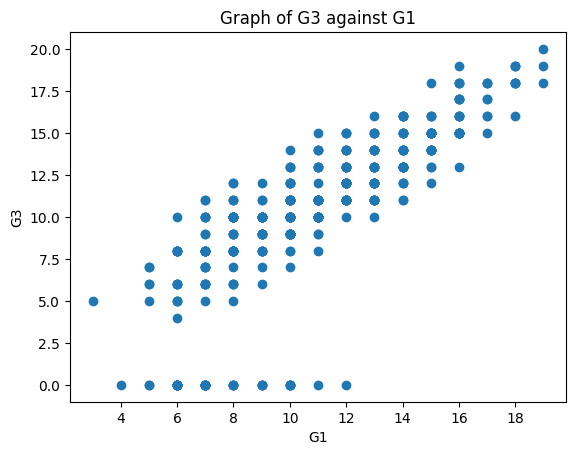

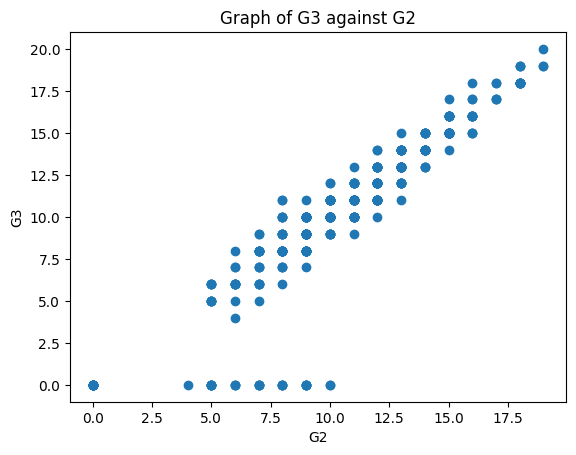

In [6]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

def plot(p):
    plt.scatter(data[p], data["G3"])
    plt.xlabel(p)
    plt.ylabel("G3")
    plt.title(f"Graph of G3 against {p}")
    plt.show()

plot("G1")
plot("G2")

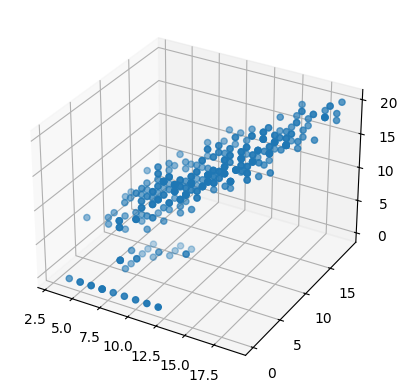

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(data["G1"], data["G2"], data["G3"])

In [8]:
import plotly.express as px 

fig = px.scatter_3d(data, x="G1", y="G2", z="G3")
fig.show()

the linear regression model only works for data sets where a best fit line can be drawn reasonably well, and the data takes a linear form

## Preparing the model 

In [28]:
predict = "G3"
x = np.array(data.drop([predict], axis=1) )
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

def train():
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    return acc

acc = train()

print(acc)

predictions = linear.predict(x_test)

for i in range(len(predictions)):
    print(predictions[i], x_test[i], y_test[i])

0.7708587441567512
18.56104788463019 [18 18  3  0  5] 19
6.285832376902692 [7 7 1 0 3] 8
8.475558382495906 [8 9 1 0 5] 9
4.2526956491511925 [ 6  5  1  1 14] 5
8.21782882070104 [ 9  9  2  2 15] 9
9.287945068780807 [ 8 10  2  0  4] 10
12.843143673667425 [13 13  2  0  0] 12
12.709618782483435 [13 13  3  0  0] 13
11.993992683535039 [13 12  1  0  0] 12
10.649629248198673 [11 11  2  0  2] 10
9.635932705611035 [10 10  2  1 14] 9
11.783150764780537 [12 12  2  0  2] 11
9.140887853390858 [ 8 10  2  0  0] 12
11.947528724251981 [13 12  3  0  6] 12
7.175536090758104 [8 8 2 0 0] 9
11.233641429768918 [10 12  2  1  4] 12
13.4983498053695 [15 14  3  2  4] 15
7.175536090758104 [8 8 2 0 0] 0
9.589636339311783 [10 10  2  0  4] 11
11.250962173850416 [11 12  3  1  4] 11
8.459903242605456 [10  9  2  0  0] 9
15.458386185540038 [16 15  3  0  9] 16
7.327696846731618 [8 9 1 3 0] 10
-0.5523460685889188 [8 0 1 0 0] 0
12.9166722813624 [13 13  2  0  2] 13
8.231740579769456 [8 9 2 0 2] 10
12.839355253791888 [12 13  2

Saving the model and Improving upon the model

In [31]:
# saving the model 
import pickle 

with open("./models/studentgrades.pickle", "wb") as f: 
    pickle.dump(linear, f)


In [39]:
# finding the model with the best accuracy
best = 0 
for i in range(1000):
    acc = train()
    if acc > best:
        best = acc
        pickle_in = open("./models/studentgrades.pickle", "rb")
        linear = pickle.load(pickle_in)
print(best)

0.7708587441567512


In [40]:
pickle_in = open("./models/studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

predictions = linear.predict(x_test)
for i in range(len(predictions)):
    print(predictions[i], x_test[i], y_test[i])

18.56104788463019 [18 18  3  0  5] 19
6.285832376902692 [7 7 1 0 3] 8
8.475558382495906 [8 9 1 0 5] 9
4.2526956491511925 [ 6  5  1  1 14] 5
8.21782882070104 [ 9  9  2  2 15] 9
9.287945068780807 [ 8 10  2  0  4] 10
12.843143673667425 [13 13  2  0  0] 12
12.709618782483435 [13 13  3  0  0] 13
11.993992683535039 [13 12  1  0  0] 12
10.649629248198673 [11 11  2  0  2] 10
9.635932705611035 [10 10  2  1 14] 9
11.783150764780537 [12 12  2  0  2] 11
9.140887853390858 [ 8 10  2  0  0] 12
11.947528724251981 [13 12  3  0  6] 12
7.175536090758104 [8 8 2 0 0] 9
11.233641429768918 [10 12  2  1  4] 12
13.4983498053695 [15 14  3  2  4] 15
7.175536090758104 [8 8 2 0 0] 0
9.589636339311783 [10 10  2  0  4] 11
11.250962173850416 [11 12  3  1  4] 11
8.459903242605456 [10  9  2  0  0] 9
15.458386185540038 [16 15  3  0  9] 16
7.327696846731618 [8 9 1 3 0] 10
-0.5523460685889188 [8 0 1 0 0] 0
12.9166722813624 [13 13  2  0  2] 13
8.231740579769456 [8 9 2 0 2] 10
12.839355253791888 [12 13  2  0  4] 13
15.71573